In [1]:
#@title Import some Libraries { display-mode: "form" }
Python = "ML Libraries" #@param {type:"string"}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Dataset**

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
#@title df     -  ( DataFrame )
breast_cancer = load_breast_cancer()
# cnvert into dataframe
df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
df2 = pd.DataFrame(breast_cancer.target,columns=['target'])
df = pd.concat([df,df2],axis=1)

df.shape

(569, 31)

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

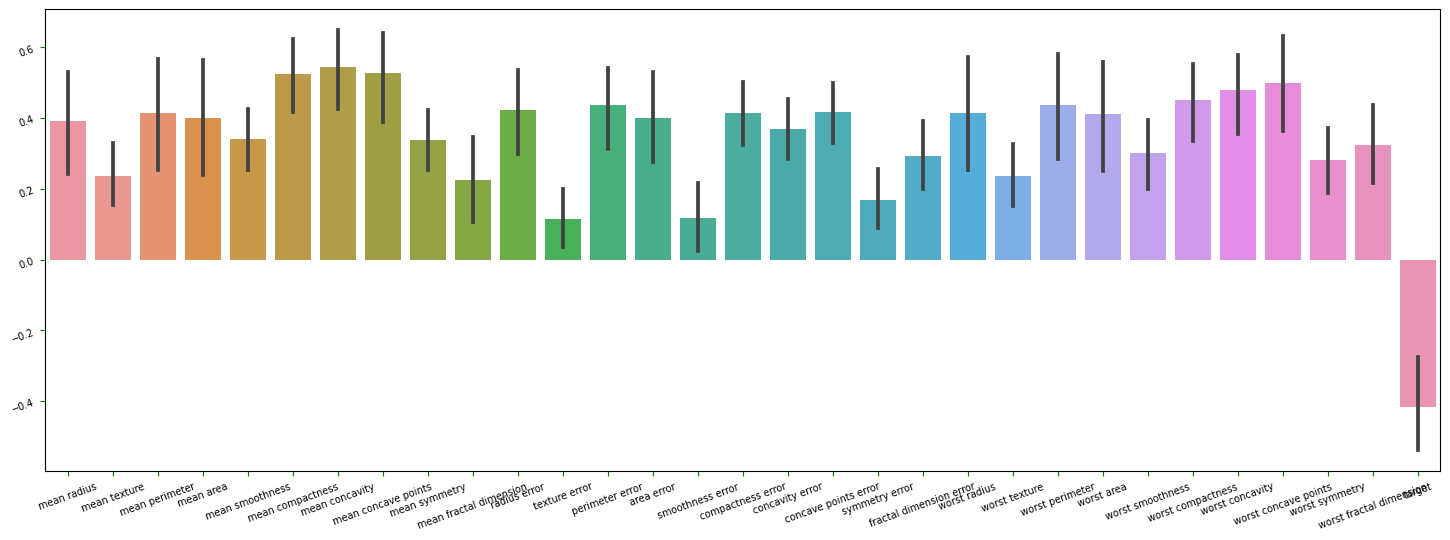

In [5]:
plt.figure(figsize=(18,6))

x = df.drop(columns='target')
y = x.corrwith(df['target'])
ax = sns.barplot(df.corr())
ax.tick_params(labelsize=7,labelrotation=20,color='g')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### **Spliting**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns='target'),df['target'],test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

### **Feature Scalling**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc  = sc.transform(x_test)

### **Artuficial Neural Network -Model Building**

In [11]:
import keras

In [12]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30,activation='relu',input_dim=30),
                                 keras.layers.Dense(16,activation='relu'),
                                 keras.layers.Dense(1,activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train_sc,y_train,batch_size=100,epochs=10,verbose=1)

Epoch 1/10
5/5 [==============================] - 7s 10ms/step - loss: 0.8598 - accuracy: 0.3165
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.7316 - accuracy: 0.4374
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6289 - accuracy: 0.6681
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 0.5437 - accuracy: 0.8198
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 0.4764 - accuracy: 0.8725
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.4199 - accuracy: 0.9033
Epoch 7/10
5/5 [==============================] - 0s 9ms/step - loss: 0.3748 - accuracy: 0.9209
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 0.3351 - accuracy: 0.9297
Epoch 9/10
5/5 [==============================] - 0s 9ms/step - loss: 0.3011 - accuracy: 0.9297
Epoch 10/10
5/5 [==============================] - 0s 10ms/step - loss: 0.2725 - accuracy: 0.9363


In [15]:
model.evaluate(x_test_sc,y_test,return_dict=True,use_multiprocessing=True)

4/4 [==============================] - 0s 12ms/step - loss: 0.2442 - accuracy: 0.9474


{'loss': 0.2441924512386322, 'accuracy': 0.9473684430122375}

In [16]:
y_pred = model.predict(x_test_sc)

4/4 [==============================] - 0s 8ms/step


In [17]:
y_pred.round(2)
y_pred = pd.DataFrame(y_pred.round(2),columns=['y_pred'])

In [18]:
# ordinal_var = {
#     True:1,
#     False:0
# }

y_pred=y_pred>=0.5
y_pred['y_pred'].unique()

array([ True, False])

In [19]:
apt = []

for i in range(len(y_pred['y_pred'])):
    # y_pred['y_pred'][i] = y_pred['y_pred'][i].map(ordinal_val)
    if y_pred['y_pred'][i]==True:
      apt.append(1)
    else:
      apt.append(0)

In [20]:
pred = pd.DataFrame(apt,columns=['pred_val'])
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pred_val  114 non-null    int64
dtypes: int64(1)
memory usage: 1.0 KB


In [21]:
# predicted value in            pred
# test Actual value in          y_test

predicted value

In [22]:
y_pred

,y_pred
0,True
1,False
2,False
3,True
4,True
5,False
6,False
7,False
8,False
9,True


In [23]:
len(y_test),y_test.shape

(114, (114,))

In [24]:
y_pr = []

y_predicted = model.predict(x_test_sc)
print('y_pred',' ','y_test')
for i in range(len(y_test)):
  if y_predicted[i]>=0.5:
    y_predicted[i]=1
  else:
    y_predicted[i]=0
  # print(int(y_predicted[i][0]),'     ',y_test.iloc[i])
  y_pr.append(int(y_predicted[i][0]))

4/4 [==============================] - 0s 4ms/step
y_pred   y_test


### **Confusion Matrix**

In [25]:
for i in range(25):
  print(y_pr[i],y_test.iloc[i])

arr=np.array(y_pr)

1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 1
1 1
1 1
0 0
1 1
1 0
1 1
1 0
1 1
1 1
1 1
0 0
1 0
1 1
0 0
1 1
1 1


In [26]:
arr

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [27]:
from sklearn.metrics import classification_report,r2_score,confusion_matrix

In [28]:
confusion_matrix(y_test,pred)

array([[39,  4],
       [ 2, 69]])

<Axes: >

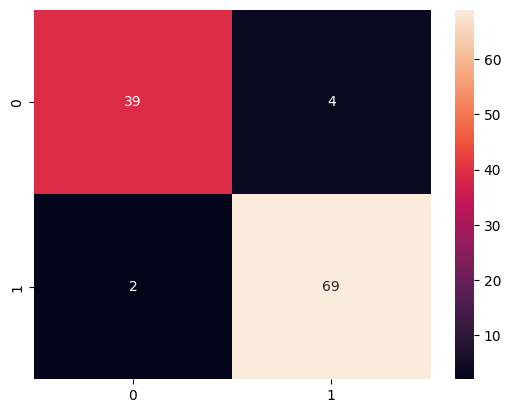

In [29]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [30]:
clf_report = classification_report(y_test,pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [31]:
r2_score(y_test,pred)

0.7759580740255486

### **Save Model**

In [32]:
model.save('breast_cancer_ann_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
# load your model
loaded_model = keras.models.load_model('/content/breast_cancer_ann_model1.h5')

In [35]:
predicted_value = loaded_model.predict(x_test_sc)
predicted_value.round(1)        # predicted probability

for i in range(len(predicted_value)):
  if predicted_value[i]>=0.5:
    predicted_value[i]=1
  else:
    predicted_value[i]=0
print(predicted_value)

4/4 [==============================] - 0s 3ms/step
[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


## **Project End**